In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs')

In [4]:
upravne_enote=data.UpravnaEnotaStoritve.unique()
upravne_enote = upravne_enote[:-1]

In [5]:
month=data.DatumPN.str.split(".").str[1].astype('int')
data['month']=month

In [6]:
#data_by_month usebuje podatke razdeljene po mesecih od 1 - 12 
data_by_month=[]
for i in range(12):
    data_by_month.append(data[data.month==i+1])

In [16]:
regije=["obalno_kraška","goriška","gorenjska","osrednjeslovenska","primorsko_notranjska","juhovzhodna","zasavska","savinjska","posavska","koroška","podravska","pomurska"]
regije_dict = dict()
regije_dict['obalno_kraška']=['IZOLA','KOPER','PIRAN','SEŽANA'] 
regije_dict['goriška']=['AJDOVŠÈINA','IDRIJA','NOVA GORICA','TOLMIN']
regije_dict['gorenjska']=['JESENICE','KRANJ','RADOVLJICA','TRŽIÈ','ŠKOFJA LOKA',]
regije_dict['osrednjeslovenska']=['LJUBLJANA','DOMŽALE','GROSUPLJE','KAMNIK','LOGATEC','VRHNIKA']
regije_dict['primorsko_notranjska']=['CERKNICA','ILIRSKA BISTRICA','POSTOJNA']
regije_dict['juhovzhodna']=['ÈRNOMELJ','KOÈEVJE','METLIKA','NOVO MESTO','RIBNICA','TREBNJE']
regije_dict['zasavska']=['HRASTNIK','TRBOVLJE','LITIJA','ZAGORJE OB SAVI']
regije_dict['savinjska']=['CELJE','LAŠKO','MOZIRJE','SLOVENSKE KONJICE','ŠENTJUR PRI CELJU','ŠMARJE PRI JELŠAH','VELENJE','ŽALEC']
regije_dict['posavska']=['BREŽICE','KRŠKO','SEVNICA']
regije_dict['koroška']=['SLOVENJ GRADEC','DRAVOGRAD','RAVNE NA KOROŠKEM','RADLJE OB DRAVI']
regije_dict['podravska']=['LENART','MARIBOR','ORMOŽ','PESNICA','PTUJ','RUŠE','SLOVENSKA BISTRICA',]
regije_dict['pomurska']=['GORNJA RADGONA','LENDAVA','LJUTOMER','MURSKA SOBOTA',]

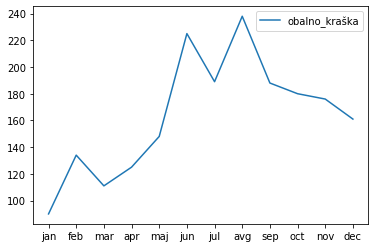

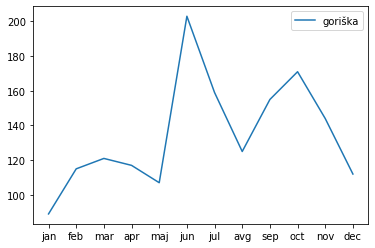

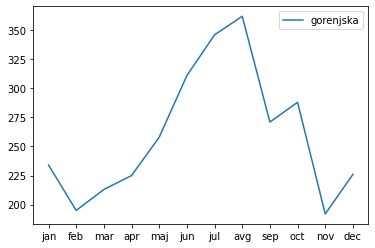

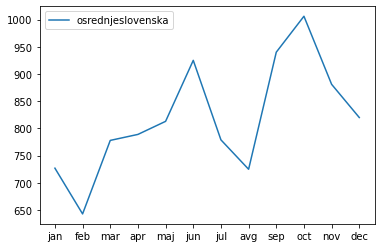

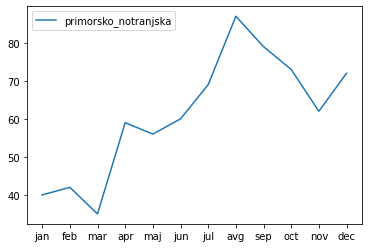

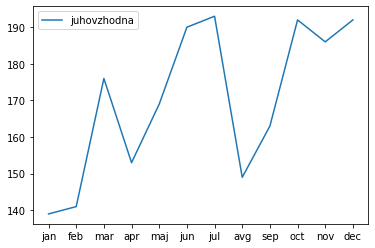

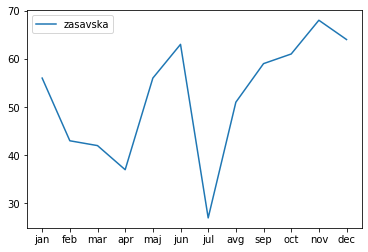

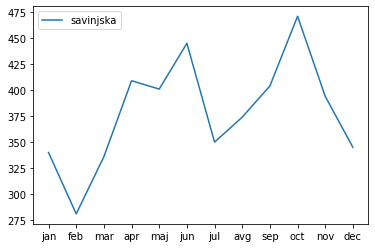

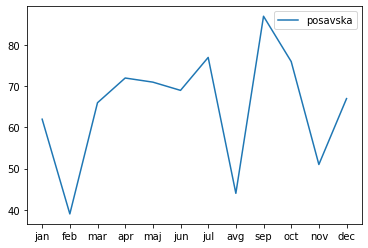

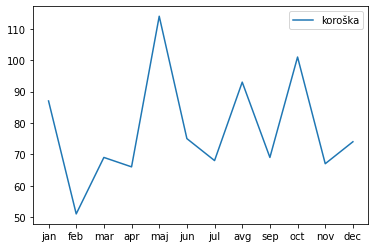

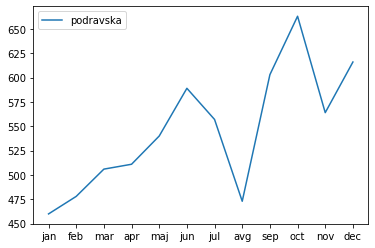

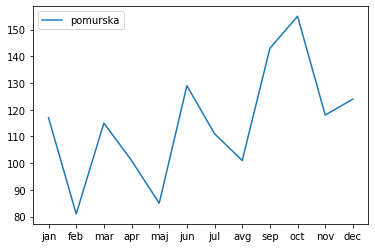

In [31]:
tmp=[]
months=["jan","feb","mar","apr","maj","jun","jul","avg","sep","oct","nov","dec"]
for regija in regije:
    for month in data_by_month:
        tmp.append(month[month.UpravnaEnotaStoritve.isin(regije_dict[regija])].shape[0])
    plt.figure()
    plt.plot(months,tmp,label=regija)
    tmp=[]
    plt.legend()
    plt.show()

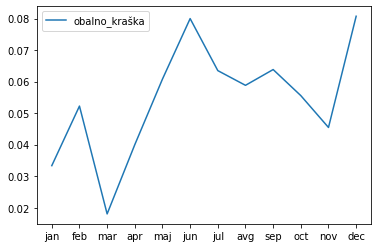

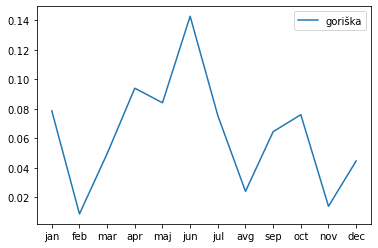

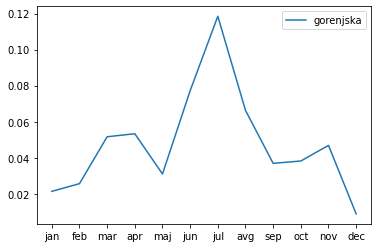

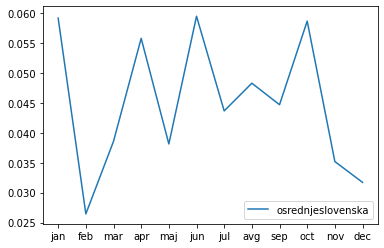

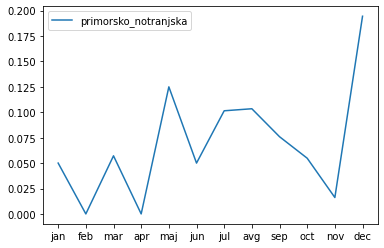

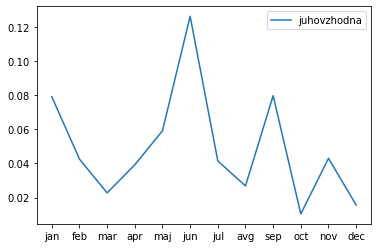

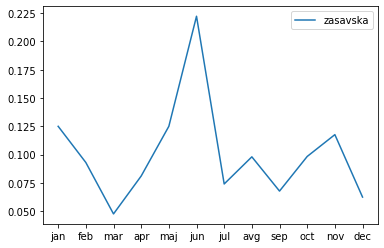

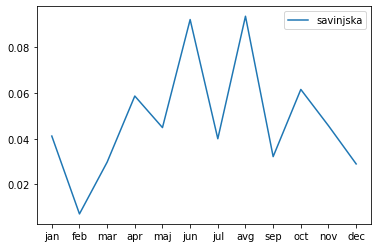

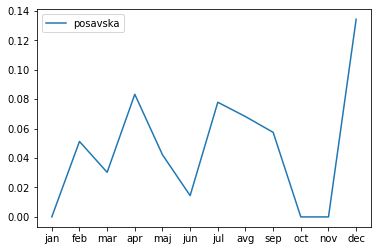

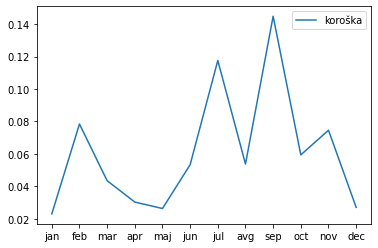

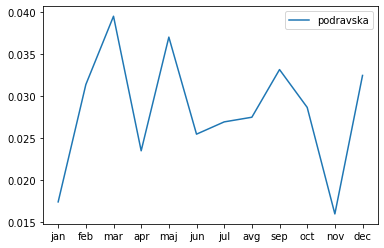

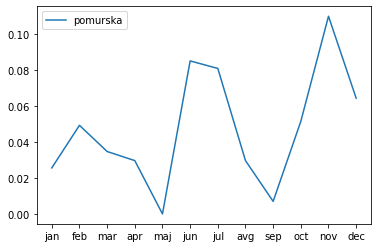

In [36]:
tmp=[]
months=["jan","feb","mar","apr","maj","jun","jul","avg","sep","oct","nov","dec"]
for regija in regije:
    for month in data_by_month:
        tmp.append(month[(month.UpravnaEnotaStoritve.isin(regije_dict[regija]))&((month.KlasifikacijaNesrece=='S HUDO TELESNO POŠKODBO')|(month.KlasifikacijaNesrece=='S SMRTNIM IZIDOM'))].shape[0]/month[month.UpravnaEnotaStoritve.isin(regije_dict[regija])].shape[0])
    plt.figure()
    plt.plot(months,tmp,label=regija)
    tmp=[]
    plt.legend()
    plt.show()